Exploratory Data Analysis (EDA)

I will be focusing on the 'a.us' stock specifically and creating models that can be used with other stocks as well.

I plotted the change in the stock's closing, opening, volume, moving average, and daily returns over time for 'a' stock in 2016.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import os
import io
from datetime import datetime

In [23]:
# Data loading
data0 = pd.read_csv("a.us.txt")
data1 = pd.read_csv("aa.us.txt")
data2 = pd.read_csv("aaap.us.txt")
data3 = pd.read_csv("aaba.us.txt")
data4 = pd.read_csv("aac.us.txt")
data5 = pd.read_csv("aal.us.txt")
data6 = pd.read_csv("aamc.us.txt")
data7 = pd.read_csv("aame.us.txt")
data8 = pd.read_csv("aan.us.txt")
data9 = pd.read_csv("aaoi.us.txt")

# Create a list of the different stocks for later use
stock_list = [data1, data2, data3, data4, data5, data6, data7, data8, data9]

# We only want to look at the data of 1 year
start_date = '2016-01-01'
end_date = '2016-12-31'

# We are storing the names of the different stocks that correspond to each data
names = ['a', 'aa', 'aaap', 'aaba', 'aac', 'aal', 'aamc', 'aame', 'aan', 'aaoi'] 

# We are only looking at 2016 stock data for 'a'
del data0['OpenInt']
year16 = (data0['Date'] >= start_date) & (data0['Date'] <= end_date) 
df0 = data0.loc[year16]
df0 = df0.reset_index(drop=True)

print(df0)

           Date    Open    High     Low   Close   Volume
0    2016-01-04  40.342  40.470  39.636  39.979  3345785
1    2016-01-05  40.018  40.235  39.636  39.842  2633248
2    2016-01-06  39.538  40.275  39.349  40.018  2141021
3    2016-01-07  39.439  39.449  38.132  38.317  3566226
4    2016-01-08  38.535  39.011  37.793  37.916  3803208
..          ...     ...     ...     ...     ...      ...
247  2016-12-23  45.638  45.788  45.490  45.758   734717
248  2016-12-27  45.927  46.208  45.877  46.065  1550334
249  2016-12-28  46.065  46.253  45.242  45.282  1175850
250  2016-12-29  45.374  45.691  45.264  45.334   897417
251  2016-12-30  45.454  45.513  45.071  45.254  1224312

[252 rows x 6 columns]


In [24]:
# Changing type from object to datetime type
df0['Date'] = pd.to_datetime(df0.Date, format='%Y-%m-%d')

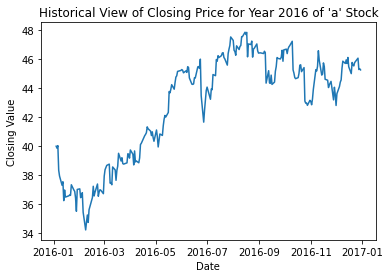

In [7]:
plt.plot(df0['Date'], df0['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.title("Historical View of Closing Price for Year 2016 of 'a' Stock")
plt.show()

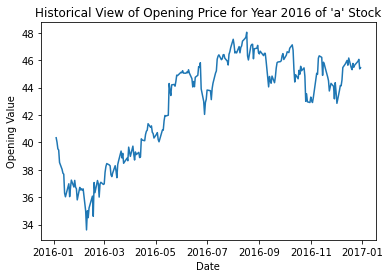

In [8]:
plt.plot(df0['Date'], df0['Open'])
plt.xlabel('Date')
plt.ylabel('Opening Value')
plt.title("Historical View of Opening Price for Year 2016 of 'a' Stock")
plt.show()

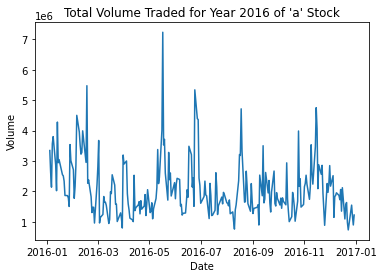

In [9]:
plt.plot(df0['Date'], df0['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Total Volume Traded for Year 2016 of 'a' Stock")
plt.show()

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [10]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s Days" %(str(ma))
    df0[column_name]=pd.DataFrame.rolling(df0['Close'], ma).mean()

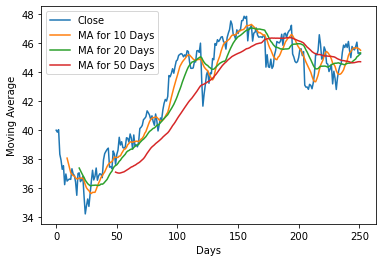

In [11]:
df0[['Close','MA for 10 Days','MA for 20 Days','MA for 50 Days']].plot()
plt.xlabel('Days')
plt.ylabel('Moving Average')
plt.show()

We are going to look at the Daily Returns of the stock. The daily return measures the dollar change in a stock's price as a percentage of the previous day's closing price. A positive return means the stock has grown in value, while a negative return means it has lost value.

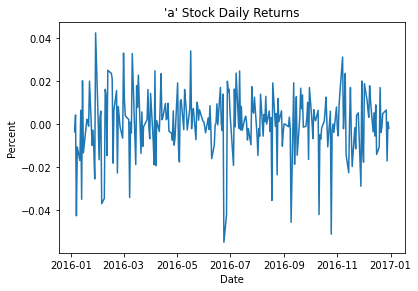

In [12]:
daily_return0 = df0['Close'].pct_change()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(df0['Date'], daily_return0)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("'a' Stock Daily Returns")
plt.show()

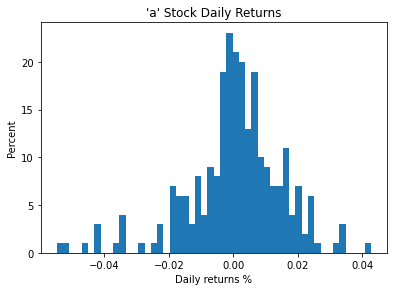

In [13]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
daily_return0.plot.hist(bins = 50)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("'a' Stock Daily Returns")
plt.show()

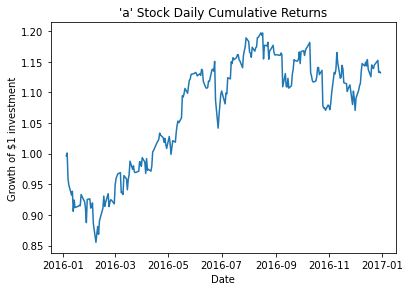

In [14]:
cum_return0 = (daily_return0 + 1).cumprod()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(df0['Date'], cum_return0)
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("'a' Stock Daily Cumulative Returns")
plt.show()

For a period of 1 year, if one were to invest 1 dollar in January of 2016, it is possible that one can make a profit of around 15 cents. 

Now we are going to calculate the Daily Returns of the rest of the other 9 stocks.

In [26]:
# This column all have 0, so we delete it since information is not useful
for stock in stock_list:
    del stock['OpenInt']

In [38]:
def Daily_Returns(stock, title):
    year16 = (stock['Date'] >= start_date) & (stock['Date'] <= end_date)
    df = stock.loc[year16]
    df = df.reset_index(drop=True)
    daily_returns = df['Close'].pct_change()
    cum_returns = (daily_returns + 1).cumprod()
    
    fig = plt.figure()
    ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
    ax1.plot(df0['Date'], cum_return0)
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Growth of $1 investment")
    ax1.set_title(title)
    plt.show()

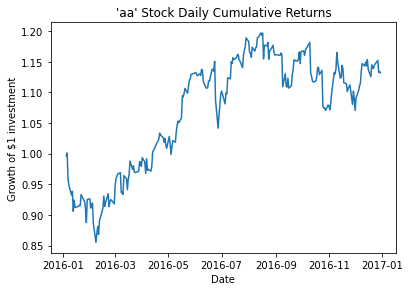

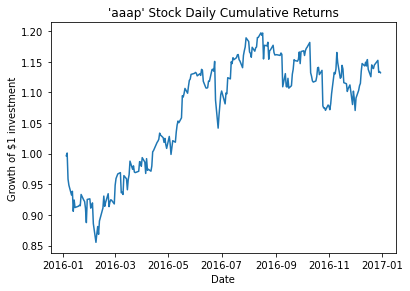

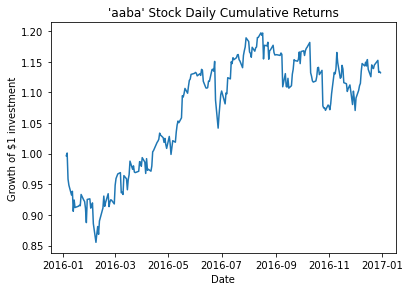

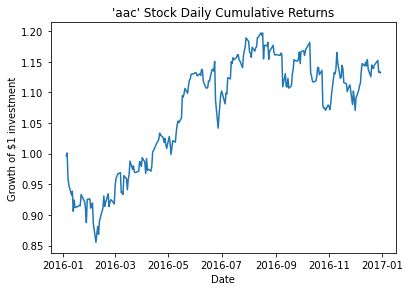

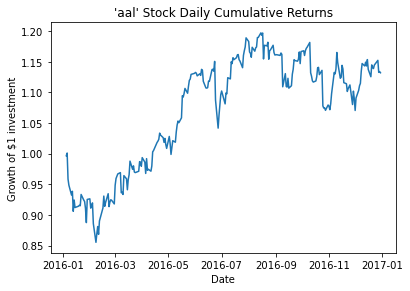

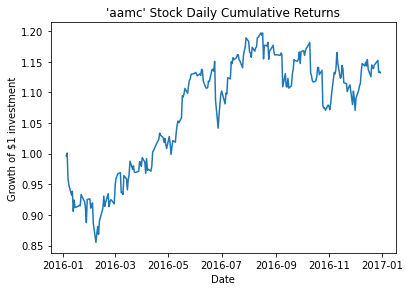

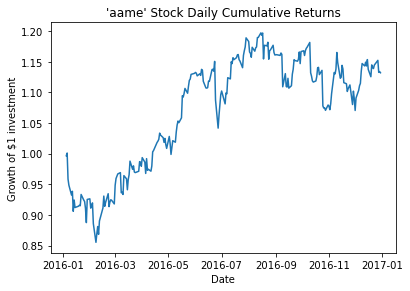

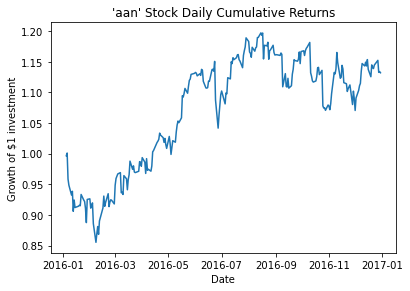

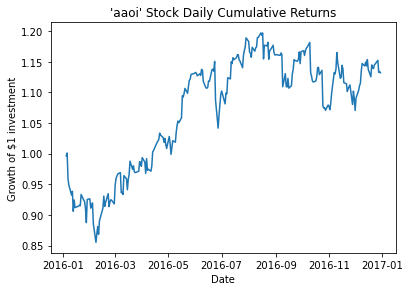

In [37]:
Daily_Returns(data1, "'aa' Stock Daily Cumulative Returns")
Daily_Returns(data2, "'aaap' Stock Daily Cumulative Returns")
Daily_Returns(data3, "'aaba' Stock Daily Cumulative Returns")
Daily_Returns(data4, "'aac' Stock Daily Cumulative Returns")
Daily_Returns(data5, "'aal' Stock Daily Cumulative Returns")
Daily_Returns(data6, "'aamc' Stock Daily Cumulative Returns")
Daily_Returns(data7, "'aame' Stock Daily Cumulative Returns")
Daily_Returns(data8, "'aan' Stock Daily Cumulative Returns")
Daily_Returns(data9, "'aaoi' Stock Daily Cumulative Returns")

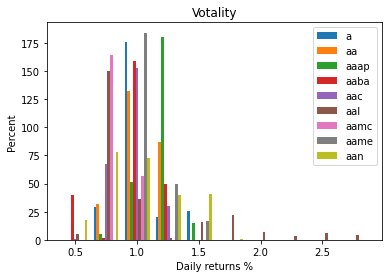

In [54]:
cum_returns = []
def Cumulative(stock_list):
    for stock in stock_list:
        year16 = (stock['Date'] >= start_date) & (stock['Date'] <= end_date)
        df = stock.loc[year16]
        df = df.reset_index(drop=True)
        daily_returns = df['Close'].pct_change()
        cum_returns.append((daily_returns + 1).cumprod())
    return cum_returns

Cumulative(stock_list)

plt.hist(cum_returns, label=names)
plt.legend()
plt.xlabel('Daily returns %')
plt.ylabel('Percent')
plt.title('Votality')
plt.show()

A percentage increase in stock value is the change in stock comparing that to the previous day. The bigger the value either positive or negative, the more volatile the stock is. Therefore, if we plot the votality of the plot, we can see which one has the wider graph which means it has the highest votality. Having a higher votality indicates that there is more risk involved. Having a higher risk indicates that you can have a higher return or loss if investing in this particular stock.